In [81]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### helper function

In [82]:
g = 9.806 # (m/sec^2)
h = 0.001 # (sec)
PI = math.pi


def cross_prod(a1, a2, a3, b1, b2, b3):
    vec_i = a2*b3 - b2*a3
    vec_j = b1*a3 - a1*b3
    vec_k = a1*b2 - b1*a2
    return vec_i, vec_j, vec_k


def unit_vec(c1, c2, c3):
    tmp_length = math.sqrt(c1*c1 + c2*c2 + c3*c3)
    unit_i = c1/tmp_length
    unit_j = c2/tmp_length
    unit_k = c3/tmp_length
    return unit_i, unit_j, unit_k


def vec_length(d1, d2, d3):
    return math.sqrt(d1*d1 + d2*d2 + d3*d3) 


def minus_vec(e1, e2, e3):
    return -1*e1, -1*e2, -1*e3


def ax(v_ball_i, v_ball_j, v_ball_k, \
       w_unit_i, w_unit_j, w_unit_k, \
       C_D, C_L, rho_air, m, D):

    A = (D/2)**2*PI

    U_i = -1*v_ball_i 
    U_j = -1*v_ball_j 
    U_k = -1*v_ball_k 

    abs_FD = C_D*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    abs_FL = C_L*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    
    U_unit_i,  U_unit_j,  U_unit_k = unit_vec(U_i, U_j, U_k)
    FL_unit_i, FL_unit_j, FL_unit_k = cross_prod(U_unit_i, U_unit_j, U_unit_k, \
                                                 w_unit_i, w_unit_j, w_unit_k)
    ans = abs_FD*U_unit_i + abs_FL*FL_unit_i
    return ans/m


def ay(v_ball_i, v_ball_j, v_ball_k, \
       w_unit_i, w_unit_j, w_unit_k, \
       C_D, C_L, rho_air, m, D):
    
    A = (D/2)**2*PI
    
    U_i = -1*v_ball_i 
    U_j = -1*v_ball_j 
    U_k = -1*v_ball_k 
    
    abs_FD = C_D*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    abs_FL = C_L*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    
    U_unit_i,  U_unit_j,  U_unit_k = unit_vec(U_i, U_j, U_k)
    FL_unit_i, FL_unit_j, FL_unit_k = cross_prod(U_unit_i, U_unit_j, U_unit_k, \
                                                 w_unit_i, w_unit_j, w_unit_k)
    ans = abs_FD*U_unit_j + abs_FL*FL_unit_j
    return ans/m


def az(v_ball_i, v_ball_j, v_ball_k, \
       w_unit_i, w_unit_j, w_unit_k, \
       C_D, C_L, rho_air, m, D):
    
    A = (D/2)**2*PI
    
    U_i = -1*v_ball_i 
    U_j = -1*v_ball_j 
    U_k = -1*v_ball_k 
    
    abs_FD = C_D*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    abs_FL = C_L*A*rho_air*(U_i**2 + U_j**2 + U_k**2)/2
    
    U_unit_i,  U_unit_j,  U_unit_k = unit_vec(U_i, U_j, U_k)
    FL_unit_i, FL_unit_j, FL_unit_k = cross_prod(U_unit_i, U_unit_j, U_unit_k, \
                                                 w_unit_i, w_unit_j, w_unit_k)
    ans = abs_FD*U_unit_k + abs_FL*FL_unit_k - m*g
    return ans/m


def RK4(tn, \
        xn, yn, zn, \
        v_xn, v_yn, v_zn, \
        w_unit_i, w_unit_j, w_unit_k, \
        C_D, C_L, rho_air, m, D):
    # For step-by-step calculations of variables changed with time, 
    # we integrate with fourth-order Runge-Kutta method,
    # and then integrate Euler method.
    #---------------------------------------
    kx1 = ax(v_xn, v_yn, v_zn, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    ky1 = ay(v_xn, v_yn, v_zn, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    kz1 = az(v_xn, v_yn, v_zn, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    #---------------------------------------
    kx2 = ax(v_xn+kx1*h/2, v_yn+ky1*h/2, v_zn+kz1*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    ky2 = ay(v_xn+kx1*h/2, v_yn+ky1*h/2, v_zn+kz1*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    kz2 = az(v_xn+kx1*h/2, v_yn+ky1*h/2, v_zn+kz1*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    #---------------------------------------
    kx3 = ax(v_xn+kx2*h/2, v_yn+ky2*h/2, v_zn+kz2*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    ky3 = ay(v_xn+kx2*h/2, v_yn+ky2*h/2, v_zn+kz2*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    kz3 = az(v_xn+kx2*h/2, v_yn+ky2*h/2, v_zn+kz2*h/2, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    #---------------------------------------
    kx4 = ax(v_xn+kx3*h, v_yn+ky3*h, v_zn+kz3*h, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    ky4 = ay(v_xn+kx3*h, v_yn+ky3*h, v_zn+kz3*h, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    kz4 = az(v_xn+kx3*h, v_yn+ky3*h, v_zn+kz3*h, w_unit_i, w_unit_j, w_unit_k, C_D, C_L, rho_air, m, D)
    #---------------------------------------
    v_xn1 = v_xn + h*(kx1+2*kx2+2*kx3+kx4)/6
    v_yn1 = v_yn + h*(ky1+2*ky2+2*ky3+ky4)/6
    v_zn1 = v_zn + h*(kz1+2*kz2+2*kz3+kz4)/6
    #---------------------------------------
    tn1 = tn + h  # h = 0.001s
    #---------------------------------------
    xn1 = xn + (v_xn+v_xn1)*h/2
    yn1 = yn + (v_yn+v_yn1)*h/2
    zn1 = zn + (v_zn+v_zn1)*h/2
    #---------------------------------------
    return tn1, v_xn1, v_yn1, v_zn1, xn1, yn1, zn1


### Track function

In [72]:
def TRACK(m, D, rho_air, C_D, C_L, \
          v_ball, theta, phi, \
          w_theta, w_phi, \
          altitude):
    
    # set initial conditions
    t0          = 0.0 
    x0          = 0.0
    y0          = 0.0
    z0          = 0.0
    v_x0        = v_ball*math.cos(theta)*math.cos(phi)
    v_y0        = v_ball*math.cos(theta)*math.sin(phi)
    v_z0        = v_ball*math.sin(theta)
    w_unit_i    = math.cos(w_theta)*math.cos(w_phi)              # angular unit vector in i
    w_unit_j    = math.cos(w_theta)*math.sin(w_phi)              # angular unit vector in j
    w_unit_k    = math.sin(w_theta)                             # angular unit vector in k
    
    # set input initial conditions
    elements   = 100000 # simulate within 100 seconds
    show_t     = np.zeros(elements)
    show_x     = np.zeros(elements)
    show_y     = np.zeros(elements)
    show_z     = np.zeros(elements)
    show_vx    = np.zeros(elements)
    show_vy    = np.zeros(elements)
    show_vz    = np.zeros(elements)
    show_t[0]  = t0
    show_x[0]  = x0
    show_y[0]  = y0
    show_z[0]  = z0
    show_vx[0] = v_x0
    show_vy[0] = v_y0
    show_vz[0] = v_z0
    
    # while-loop  
    j     = 0
    tmp_z = z0
    tmp_vz= 0
    step  = 0
    while (tmp_z >= altitude or tmp_vz >= 0 and j+1 < elements):   # altitude use 0 here ??
        show_t[j+1], show_vx[j+1], show_vy[j+1], show_vz[j+1], \
        show_x[j+1],  show_y[j+1], show_z[j+1] = \
        RK4(show_t[j], \
                 show_x[j],  show_y[j], show_z[j], \
                 show_vx[j], show_vy[j], show_vz[j], \
                 w_unit_i, w_unit_j, w_unit_k, \
                 C_D, C_L, \
                 rho_air, m, D)
        tmp_z = show_z[j+1]
        tmp_vz= show_vz[j+1]
        j=j+1
        step=j
    print_show_x = ("%5.3f" % show_x[step]).strip()
    print_show_y = ("%5.3f" % show_y[step]).strip()
    print_show_t = ("%5.3f" % show_t[step]).strip()
    tmp_distance = math.sqrt(show_x[step]**2 + show_y[step]**2)
    print_distance = ("%5.3f" % tmp_distance).strip()
    """
    print('    Fly time:           ', print_show_t, '(sec)')
    print('    Fly distance:       ', print_distance, '(m)')
    print('    Drop location in X: ', print_show_x, '(m)')
    print('    Drop location in Y: ', print_show_y, '(m)')
    print('--------------------------------------------')
    """
    
    #return show_x[:step+1], show_y[:step+1], show_z[:step+1]    # get track
    
    return show_x[step], show_y[step], math.sqrt(show_x[step]**2 + show_y[step]**2)   # get final value


### load data 
### calculate w_theta, w_phi

In [4]:
data = pd.read_csv("all_sessions_refined - data.csv")

In [6]:
ball = data[["ball_speed", "launch_angle", "azimuth", "side_spin", "back_spin"]]

In [7]:
ball.columns = ["launch_speed", "theta", "phi", "side_spin", "back_spin"]

In [8]:
ball.head()

,launch_speed,theta,phi,side_spin,back_spin
0,60.8,45.6,-3.6,544,4139
1,72.9,45.0,-8.9,281,2871
2,62.6,42.0,11.5,2032,2787
3,80.7,1.7,11.3,-3612,8678
4,64.3,25.0,9.3,4140,4847


In [9]:
ball["theta"] = ball.theta.map(lambda x: math.radians(x))
ball["phi"] = ball.phi.map(lambda x: math.radians(x))

/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
ball.head()

,launch_speed,theta,phi,side_spin,back_spin
0,60.8,0.795870,-0.062832,544,4139
1,72.9,0.785398,-0.155334,281,2871
2,62.6,0.733038,0.200713,2032,2787
3,80.7,0.029671,0.197222,-3612,8678
4,64.3,0.436332,0.162316,4140,4847


In [23]:
w_theta = np.zeros(ball.shape[0])
w_phi = np.zeros(ball.shape[0])

for i in range(ball.shape[0]):
    row = ball.iloc[i]
    w_theta[i] = math.atan(row[3]**2 * (math.cos(row[1]**2))**2 / 
                           math.sqrt((row[3]*math.sin(row[1])*math.cos(row[2]) - 
                                      row[4]*math.sin(row[2]))**2 + (row[3]*math.sin(row[1])*math.sin(row[2]) + 
                                                                     row[4]*math.cos(row[2]))**2))
    w_phi[i] = math.atan((-row[3]*math.sin(row[1])*math.sin(row[2]) - row[4]*math.cos(row[2])) / 
                         (-row[3]*math.sin(row[1])*math.cos(row[2]) + row[4]*math.sin(row[2])))

/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [24]:
ball["w_theta"] = w_theta
ball["w_phi"] = w_phi

/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
ball

,launch_speed,theta,phi,side_spin,back_spin,w_theta,w_phi
0,60.8,0.795870,-0.062832,544,4139,1.549177,1.414334
1,72.9,0.785398,-0.155334,281,2871,1.516075,1.346364
2,62.6,0.733038,0.200713,2032,2787,1.569779,1.317618
3,80.7,0.029671,0.197222,-3612,8678,1.570131,-1.361227
4,64.3,0.436332,0.162316,4140,4847,1.570485,1.386695
5,65.1,0.284489,0.144862,3047,5051,1.570241,1.547938
6,85.4,0.511381,-0.228638,0,7230,0.000000,1.342158
7,89.1,0.560251,-0.160570,340,6290,1.510699,1.381510
8,87.0,0.596903,-0.144862,410,5584,1.532963,1.384687
9,81.7,0.532325,-0.181514,46,6609,0.286991,1.385750


In [44]:
# TRACK(m, D, rho_air, C_D, C_L, v_ball, theta, phi, w_theta, w_phi, altitude)

# ?????????
# C_D = 0.8 
# C_L = 0.1

In [83]:
x = []
y = []
total = []
for i in range(ball.shape[0]):
    r = TRACK(0.04593, 0.04267, 1.2, 0.8, 0.1, \
                        ball.iloc[i][0], ball.iloc[i][1], ball.iloc[i][2], 
                        ball.iloc[i][5], ball.iloc[i][6], 0)
    x.append(r[0])
    y.append(r[1])
    total.append(r[2])

In [84]:
ball["x"] = x
ball["y"] = y
ball["total"] = total
ball.iloc[:20]

/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,launch_speed,theta,phi,side_spin,back_spin,w_theta,w_phi,x,y,total
0,60.8,0.795870,-0.062832,544,4139,1.549177,1.414334,88.657223,3.710625,88.734841
1,72.9,0.785398,-0.155334,281,2871,1.516075,1.346364,100.156059,-3.711958,100.224822
2,62.6,0.733038,0.200713,2032,2787,1.569779,1.317618,88.469542,27.945546,92.778302
3,80.7,0.029671,0.197222,-3612,8678,1.570131,-1.361227,28.218121,6.436570,28.942906
4,64.3,0.436332,0.162316,4140,4847,1.570485,1.386695,89.988904,23.412515,92.984670
5,65.1,0.284489,0.144862,3047,5051,1.570241,1.547938,80.568250,18.345406,82.630484
6,85.4,0.511381,-0.228638,0,7230,0.000000,1.342158,107.238508,-24.955182,110.103854
7,89.1,0.560251,-0.160570,340,6290,1.510699,1.381510,118.885263,-4.306123,118.963223
8,87.0,0.596903,-0.144862,410,5584,1.532963,1.384687,117.191860,-2.348371,117.215387
9,81.7,0.532325,-0.181514,46,6609,0.286991,1.385750,106.859234,-16.228248,108.084467


In [85]:
data.iloc[:20]

,session,club,ball_speed,launch_angle,azimuth,side_spin,back_spin,carry,tot_dist,offline,shot_no
0,1,Sand,60.8,45.6,-3.6,544,4139,61.06,67.54,-2.26,0.0
1,1,Sand,72.9,45.0,-8.9,281,2871,82.99,92.04,-11.93,1.0
2,1,Sand,62.6,42.0,11.5,2032,2787,66.74,75.60,25.46,2.0
3,1,Sand,80.7,1.7,11.3,-3612,8678,33.19,81.96,7.87,NaN
4,1,Sand,64.3,25.0,9.3,4140,4847,64.93,76.56,25.88,3.0
5,1,Sand,65.1,16.3,8.3,3047,5051,57.53,77.50,21.62,4.0
6,1,PW,85.4,29.3,-13.1,0,7230,106.11,114.02,-26.71,5.0
7,1,PW,89.1,32.1,-9.2,340,6290,111.72,119.56,-16.70,6.0
8,1,PW,87.0,34.2,-8.3,410,5584,108.37,116.87,-13.66,7.0
9,1,PW,81.7,30.5,-10.4,46,6609,100.42,108.43,-19.89,8.0


## Plot Track

In [63]:
row1 = ball.iloc[100]
row

launch_speed      76.900000
theta              0.818559
phi               -0.253073
side_spin       -670.000000
back_spin       6842.000000
w_theta           40.203749
w_phi              1.389103
Name: 191, dtype: float64

In [64]:
x_track, y_track, z_track = TRACK(0.04593, 0.04267, 1.2, 0.285, 0.1, row1[0], row1[1], row1[2], row1[5], row1[6], 0)

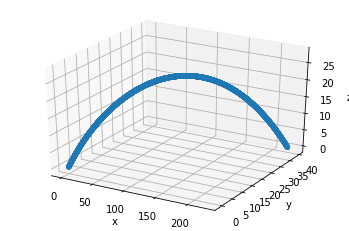

In [65]:
axe = plt.subplot(111, projection='3d')
axe.scatter(x_track, y_track, z_track)
axe.set_xlabel("x")
axe.set_ylabel("y")
axe.set_zlabel("z")
plt.show()

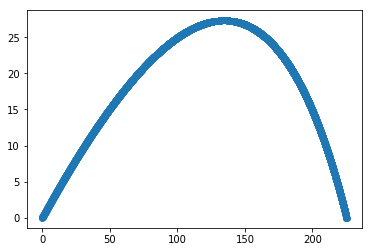

In [66]:
plt.scatter(x_track, z_track)

In [69]:
len(x_track)

4380